keypoints: 500
keypoints: 500


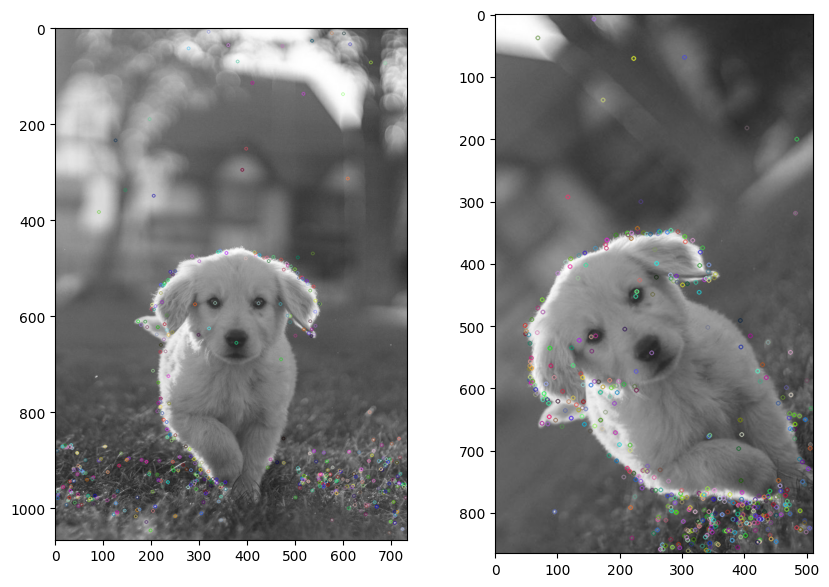

In [17]:
# create simple image alignment using orb feature detector

import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

im = cv2.imread("./images/dog1r.png", cv2.IMREAD_COLOR)
imReference = cv2.imread("./images/dog1.png", cv2.IMREAD_COLOR)

img1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(imReference, cv2.COLOR_BGR2GRAY)

# create orb feature detector
sift = cv2.SIFT_create(500)

# find keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

print(f"keypoints: {len(kp1)}")
print(f"keypoints: {len(kp2)}")

# DRAW_MATCHES_FLAGS_DEFAULT
# DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
# DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
# DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

img = cv2.drawKeypoints(img1,kp1,im,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
img_keypoints = cv2.drawKeypoints(img2,kp2,imReference,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(img_keypoints)
plt.subplot(122)
plt.imshow(img)


In [18]:

# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2, None)

print(f"matches: {len(matches)}")

# # sort matches by distance
# matches = sorted(matches, key=lambda x: x.distance, reverse=False)
# numGoodMatches = int(len(matches) * 0.10)
# matches = matches[:numGoodMatches]

# print("matches: {}".format(len(matches)))

# # draw first 50 matches
# img3 = cv2.drawMatches(img2, kp2, img1, kp1, matches,None)

# plt.figure(figsize=(20,10))
# plt.imshow(img3)




error: OpenCV(4.8.1) /io/opencv/modules/core/src/batch_distance.cpp:282: error: (-215:Assertion failed) (type == CV_8U && dtype == CV_32S) || dtype == CV_32F in function 'batchDistance'
